In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [47]:
df=pd.read_csv("election_results_2024.csv")

In [48]:
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [49]:
df.tail()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
538,Wardha,8,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared
540,West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013,Result Declared
541,Yavatmal- Washim,14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473,Result Declared
542,Zahirabad,5,SURESH KUMAR SHETKAR,Indian National Congress,B. B. PATIL,Bharatiya Janata Party,46188,Result Declared


In [50]:
df.info

<bound method DataFrame.info of          Constituency  Const. No.         Leading Candidate  \
0               AJMER          13       BHAGIRATH CHOUDHARY   
1               ALWAR           8           BHUPENDER YADAV   
2              AMBALA           1            VARUN CHAUDHRY   
3    ANANTNAG-RAJOURI           3          MIAN ALTAF AHMAD   
4           ARAKKONAM           7         S JAGATHRATCHAKAN   
..                ...         ...                       ...   
538            Wardha           8       AMAR SHARADRAO KALE   
539           Wayanad           4              RAHUL GANDHI   
540        West Delhi           6        KAMALJEET SEHRAWAT   
541  Yavatmal- Washim          14  SANJAY UTTAMRAO DESHMUKH   
542         Zahirabad           5      SURESH KUMAR SHETKAR   

                                        Leading Party  \
0                              Bharatiya Janata Party   
1                              Bharatiya Janata Party   
2                            Indian Nati

In [51]:
print("missing values in data set")
print(df.isnull().sum())

missing values in data set
Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64



# leading party

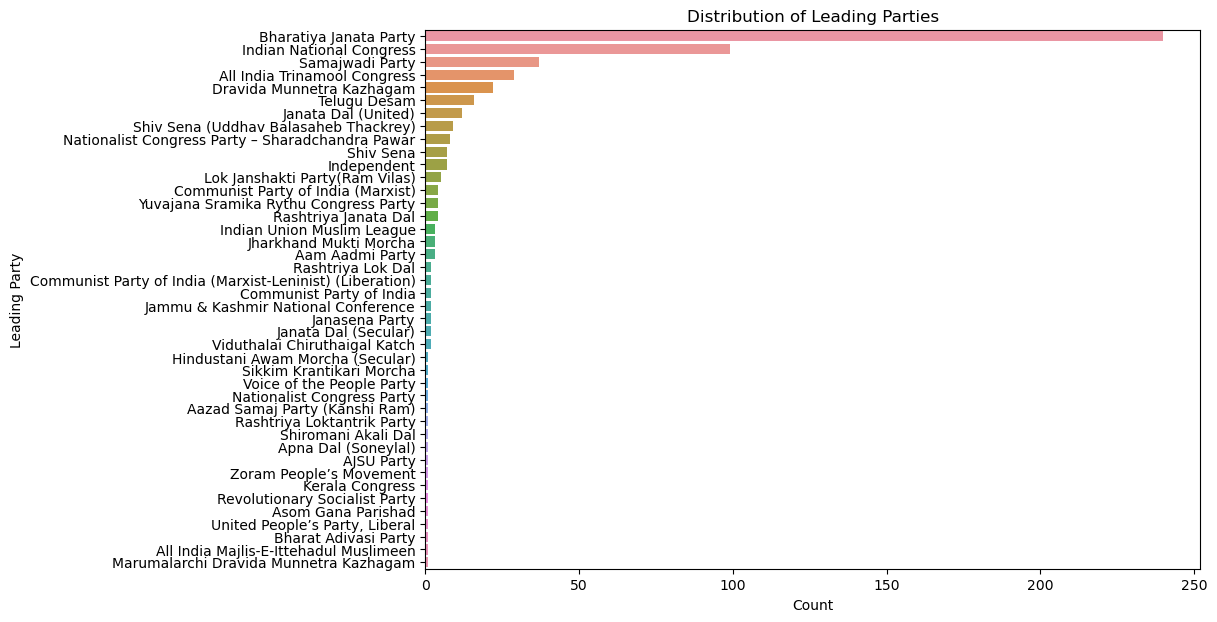

In [52]:
plt.figure(figsize=(10,7))
sns.countplot(y='Leading Party', data=df, order=df['Leading Party'].value_counts().index)
plt.title('Distribution of Leading Parties')
plt.xlabel('Count')
plt.ylabel('Leading Party')
plt.show()

# TAILING PARTY

<function matplotlib.pyplot.show(close=None, block=None)>

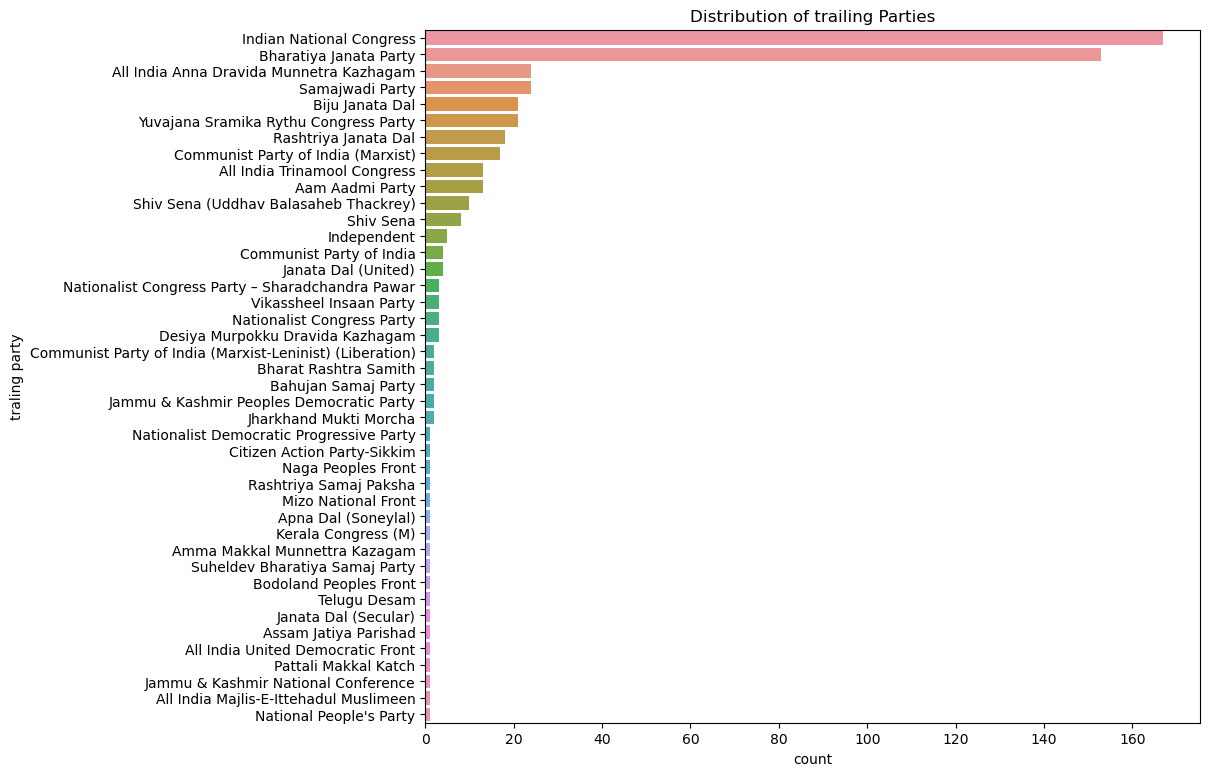

In [53]:
plt.figure(figsize=(10,9))
sns.countplot(y='Trailing Party', data =df, order=df['Trailing Party'].value_counts().index)
plt.title('Distribution of trailing Parties')
plt.xlabel('count')
plt.ylabel('traling party')
plt.show


# margine

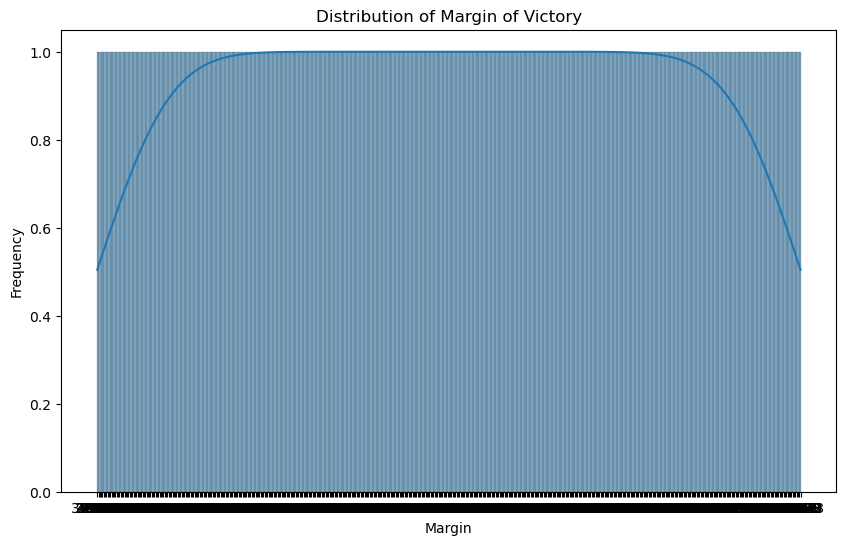

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin'], bins=30, kde=True)
plt.title('Distribution of Margin of Victory')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()

# top N constituencies with the largest margin of victory

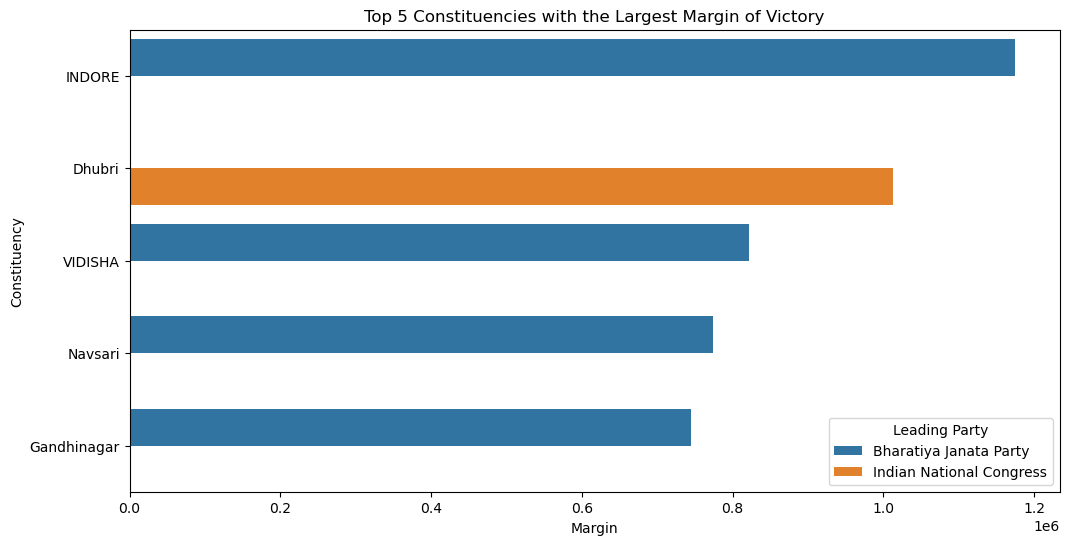

In [55]:
def plot_top_n_margins(df, n=5):

    df['Margin'] = df['Margin'].replace('-', '0')
    df['Margin'] = df['Margin'].str.replace(',', '').astype(int)
    
    top_n_margin = df.nlargest(n, 'Margin')
    

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Margin', y='Constituency', data=top_n_margin, hue='Leading Party')
    plt.title(f'Top {n} Constituencies with the Largest Margin of Victory')
    plt.xlabel('Margin')
    plt.ylabel('Constituency')
    plt.legend(title='Leading Party')
    plt.show()

plot_top_n_margins(df, n=5)

# Top N Candidates with the largest margin of victory

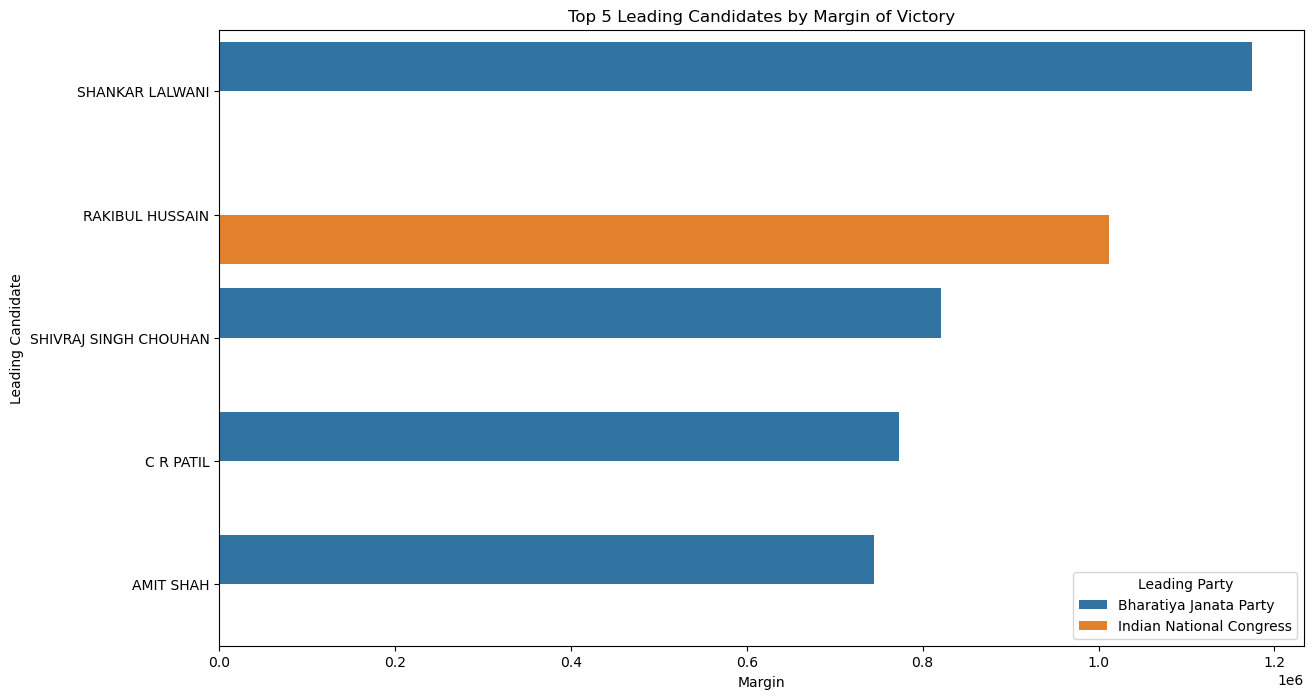

In [58]:
def top_n_leading_candidates(df, n=5):
    top_n_candidates = df.nlargest(n, 'Margin')
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Margin', y='Leading Candidate', data=top_n_candidates, hue='Leading Party')
    plt.title(f'Top {n} Leading Candidates by Margin of Victory')
    plt.xlabel('Margin')
    plt.ylabel('Leading Candidate')
    plt.legend(title='Leading Party')
    plt.show()

top_n_leading_candidates(df, n=5)


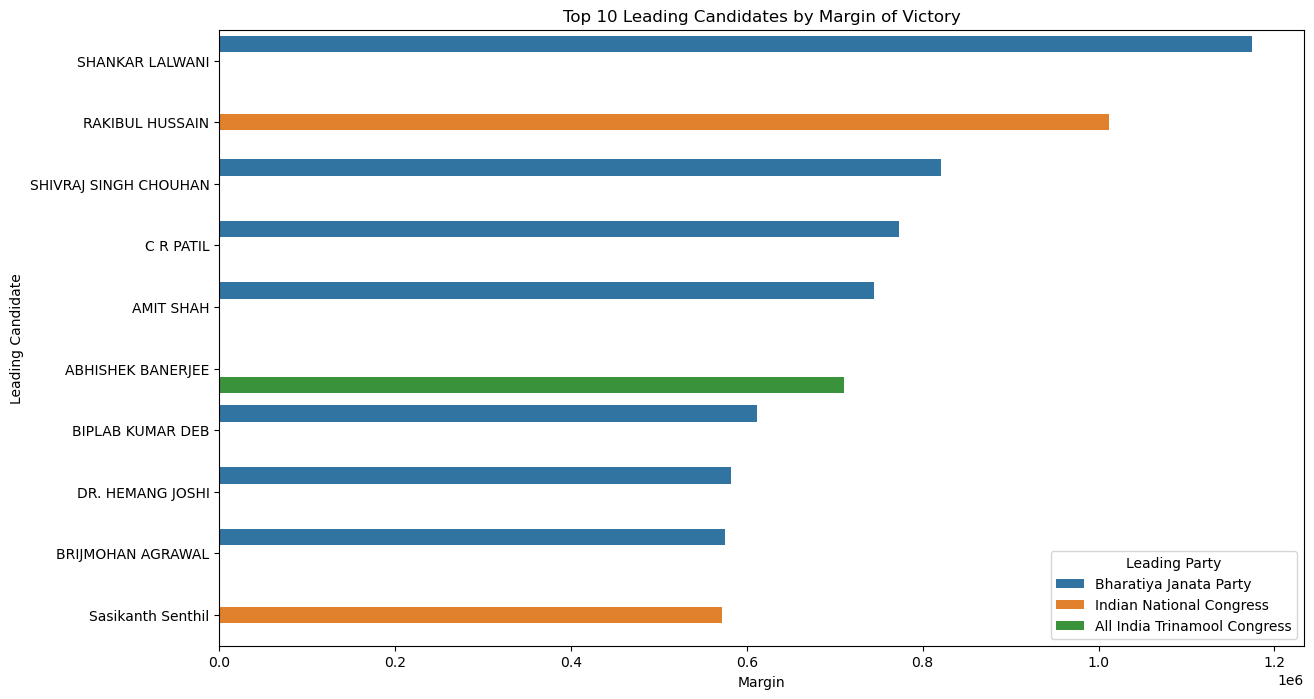

In [57]:
def top_n_leading_candidates(df, n=10):
    top_n_candidates = df.nlargest(n, 'Margin')
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Margin', y='Leading Candidate', data=top_n_candidates, hue='Leading Party')
    plt.title(f'Top {n} Leading Candidates by Margin of Victory')
    plt.xlabel('Margin')
    plt.ylabel('Leading Candidate')
    plt.legend(title='Leading Party')
    plt.show()

top_n_leading_candidates(df, n=10)


# Top N Trailing Candidates by Margin of Defeat

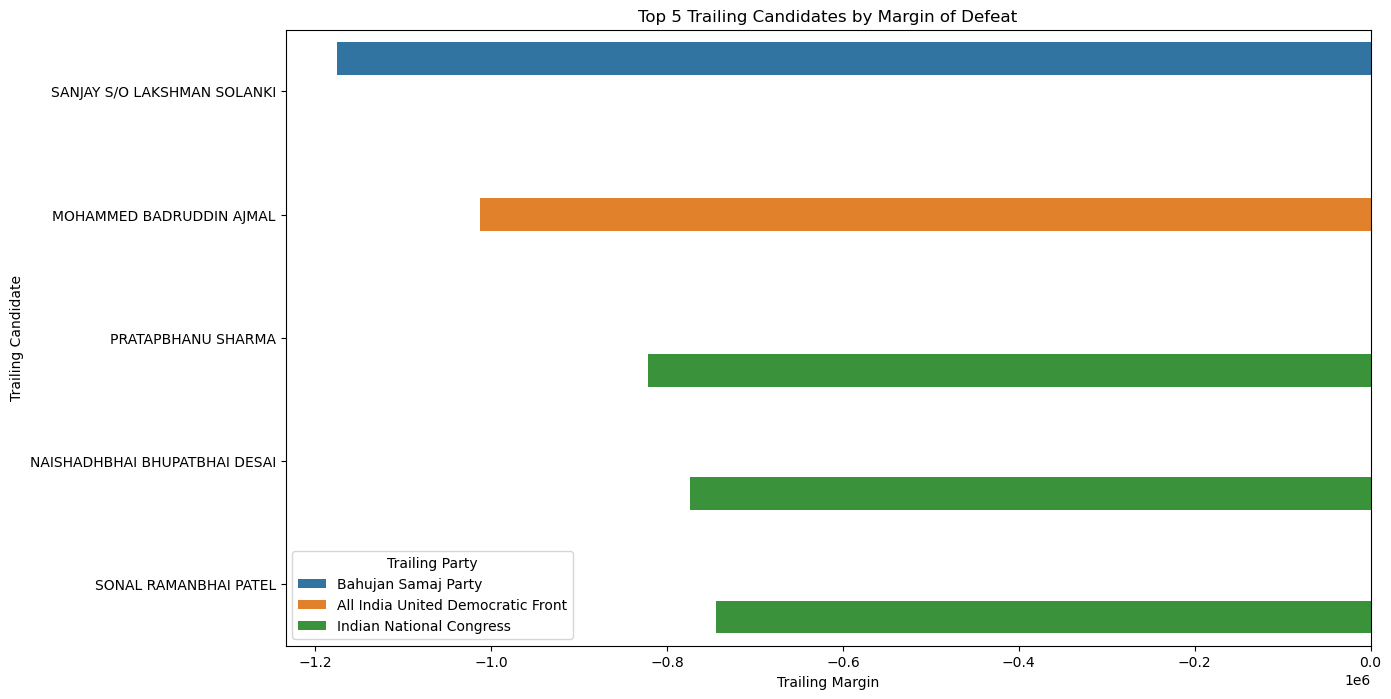

In [59]:
def top_n_trailing_candidates(df, n=5):
    trailing_margin = df.copy()
    trailing_margin['Trailing Margin'] = trailing_margin['Margin'] * -1
    top_n_candidates = trailing_margin.nsmallest(n, 'Trailing Margin')
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Trailing Margin', y='Trailing Candidate', data=top_n_candidates, hue='Trailing Party')
    plt.title(f'Top {n} Trailing Candidates by Margin of Defeat')
    plt.xlabel('Trailing Margin')
    plt.ylabel('Trailing Candidate')
    plt.legend(title='Trailing Party')
    plt.show()

top_n_trailing_candidates(df, n=5)

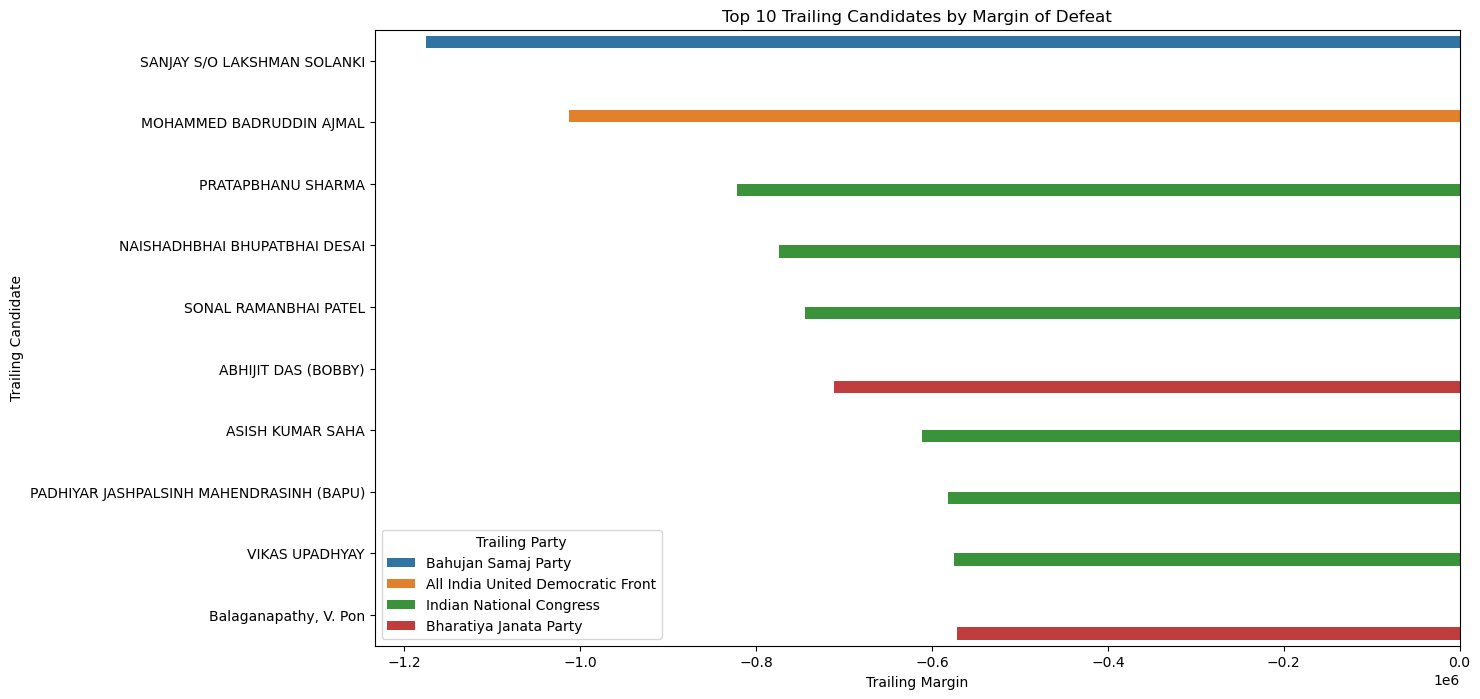

In [60]:
def top_n_trailing_candidates(df, n=10):
    trailing_margin = df.copy()
    trailing_margin['Trailing Margin'] = trailing_margin['Margin'] * -1
    top_n_candidates = trailing_margin.nsmallest(n, 'Trailing Margin')
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Trailing Margin', y='Trailing Candidate', data=top_n_candidates, hue='Trailing Party')
    plt.title(f'Top {n} Trailing Candidates by Margin of Defeat')
    plt.xlabel('Trailing Margin')
    plt.ylabel('Trailing Candidate')
    plt.legend(title='Trailing Party')
    plt.show()

top_n_trailing_candidates(df, n=10)

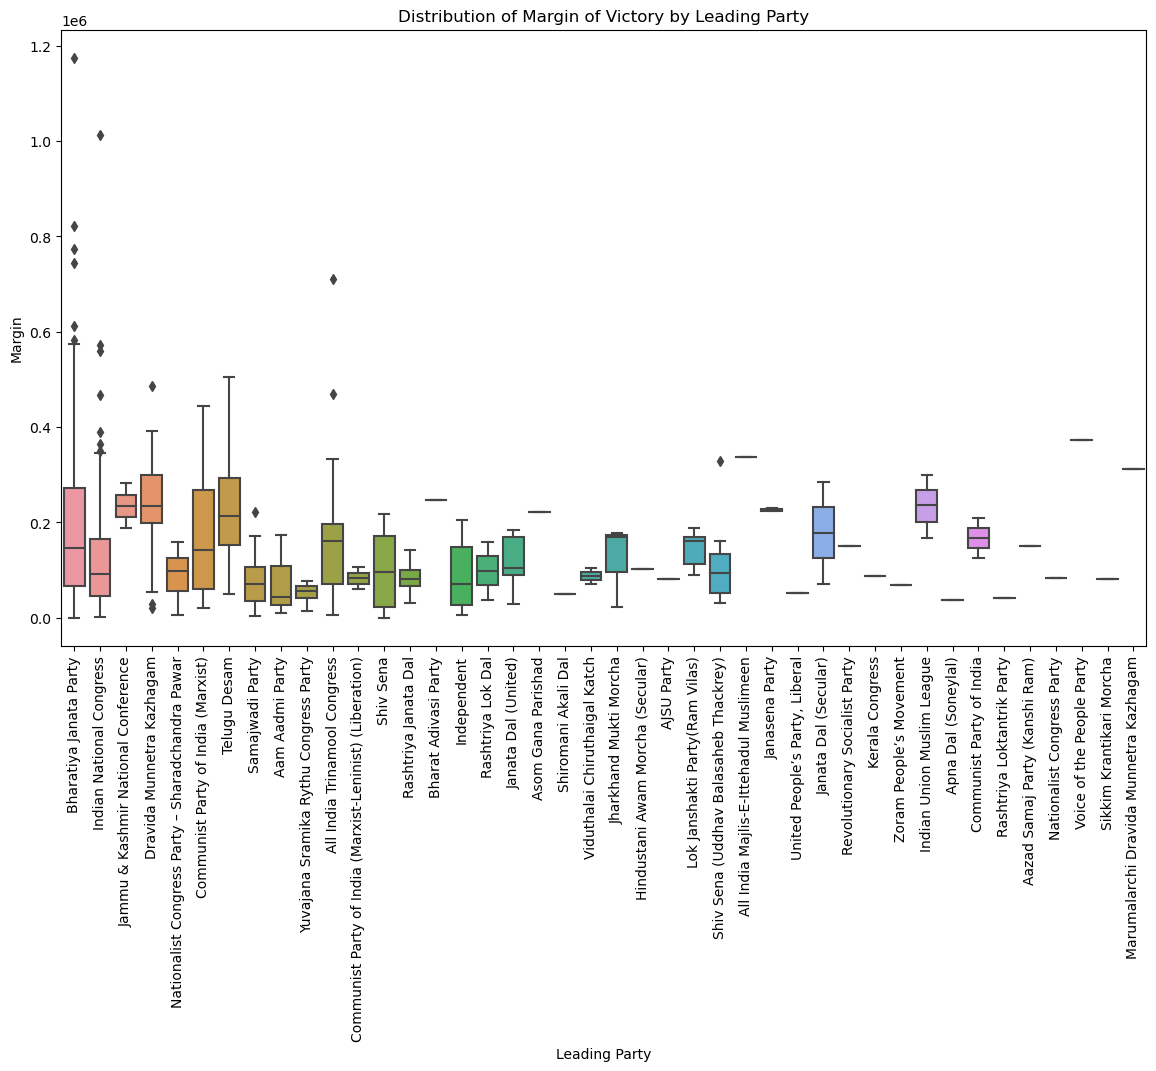

In [61]:
def party_wise_margin_distribution(df):
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Leading Party', y='Margin', data=df)
    plt.title('Distribution of Margin of Victory by Leading Party')
    plt.xlabel('Leading Party')
    plt.ylabel('Margin')
    plt.xticks(rotation=90)
    plt.show()

party_wise_margin_distribution(df)

# Compare N leading and trailing parties across constituencies

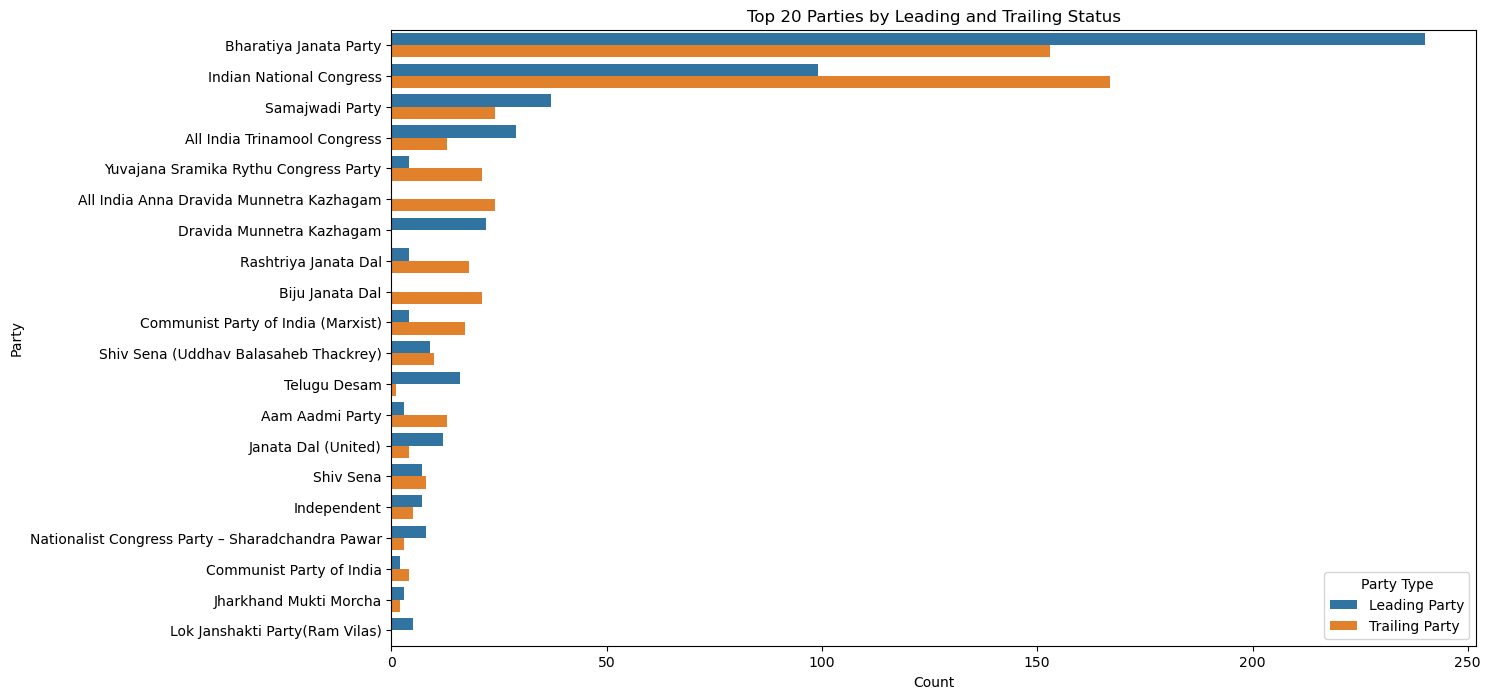

In [62]:
def leading_vs_trailing_parties(df, n=20):
    leading_trailing = df.melt(id_vars=['Constituency'], value_vars=['Leading Party', 'Trailing Party'], 
                               var_name='Party Type', value_name='Party')
    top_n_parties = leading_trailing['Party'].value_counts().index[:n]
    leading_trailing = leading_trailing[leading_trailing['Party'].isin(top_n_parties)]
    plt.figure(figsize=(14, 8))
    sns.countplot(y='Party', hue='Party Type', data=leading_trailing, order=top_n_parties)
    plt.title(f'Top {n} Parties by Leading and Trailing Status')
    plt.xlabel('Count')
    plt.ylabel('Party')
    plt.show()

leading_vs_trailing_parties(df, n=20)